In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline

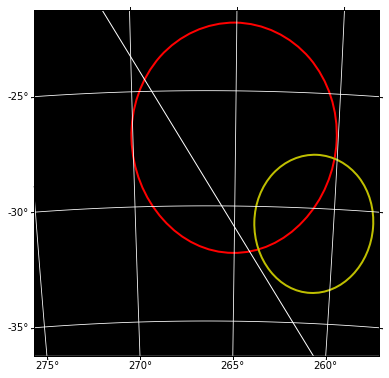

In [5]:
import numpy as np
from matplotlib.patches import Circle
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.wcs import WCS

wcs_spec =  {'CDELT1': -1.0,
             'CDELT2': 1.0,
             'CRPIX1': 8.5,
             'CRPIX2': 8.5,
             'CRVAL1': 266.416833,
             'CRVAL2': -29.007806,
             'CTYPE1': 'RA---AIT',
             'CTYPE2': 'DEC--AIT',
             'CUNIT1': 'deg',
             'CUNIT2': 'deg'}

wcs = WCS(wcs_spec)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)

c_1 = Circle((265.07333228, -27.0343367), 5, fc='none', lw=2, transform=ax.get_transform('icrs'), ec='r')
c_2 = Circle((261.003259, -30.6748939), 3, fc='none', lw=2, transform=ax.get_transform('icrs'), ec='y')

ax.imshow(np.zeros((16, 16)), cmap='gray')
ax.add_patch(c_1)
ax.add_patch(c_2)
ax.grid('on', color='w')

l = np.linspace(-10, 10, 100)
b = np.zeros_like(l)
gp = SkyCoord(l, b, frame='galactic', unit='deg').transform_to('icrs')

# add galactic plane
ax.plot(gp.ra.deg, gp.dec.deg, c='w', lw=1, transform=ax.get_transform('icrs'))
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)

plt.savefig('circle_gc_icrs.png', dpi=180)